In [18]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [33]:
hous=pd.read_csv("Bengaluru_House_Data1.csv")


hous.drop("society", axis=1,inplace=True)
hous.head()
hous.dropna(axis=0,inplace=True)
hous.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [3]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 645.4+ KB


In [4]:
hous.describe()


,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [5]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

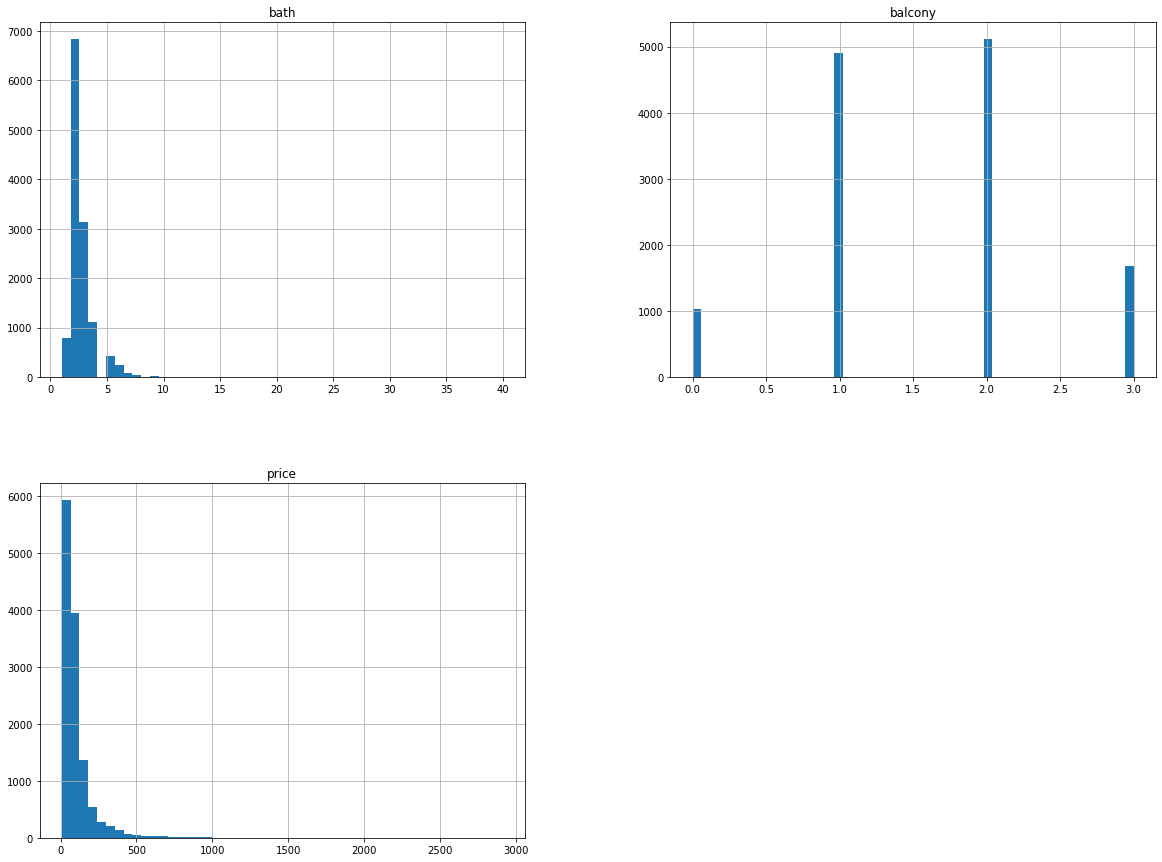

In [6]:
# # For plotting histogram
import matplotlib.pyplot as plt
hous.hist(bins=50, figsize=(20, 15))

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set  = train_test_split(hous, test_size=0.2, random_state=42)

print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 10168
Rows in test set: 2542



In [8]:
corr_matrix = hous.corr()
corr_matrix['price'].sort_values(ascending=False)

price      1.000000
bath       0.459736
balcony    0.120363
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bath', ylabel='price'>,
        <AxesSubplot:xlabel='balcony', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bath'>,
        <AxesSubplot:xlabel='bath', ylabel='bath'>,
        <AxesSubplot:xlabel='balcony', ylabel='bath'>],
       [<AxesSubplot:xlabel='price', ylabel='balcony'>,
        <AxesSubplot:xlabel='bath', ylabel='balcony'>,
        <AxesSubplot:xlabel='balcony', ylabel='balcony'>]], dtype=object)

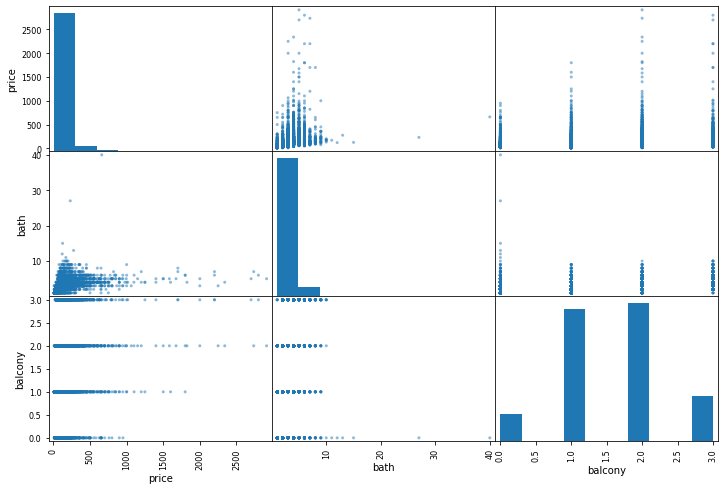

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["price", "bath", "balcony"]
scatter_matrix(hous[attributes], figsize = (12,8))

<AxesSubplot:xlabel='bath', ylabel='price'>

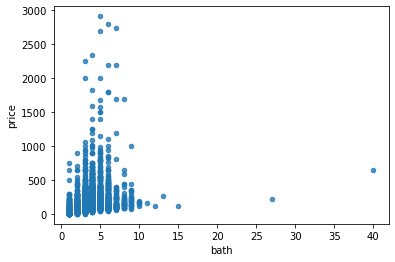

In [10]:
hous.plot(kind="scatter", x="bath", y="price", alpha=0.8)

In [11]:
hous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 645.4+ KB


In [30]:
real_x= hous.iloc[:,5:7].values

real_y= hous.iloc[:,7].values
real_x=real_x.reshape(-1,1)
real_y=real_y.reshape(-1,1)

In [32]:
training_x,testing_x,training_y,testing_y= train_test_split(real_x,real_y,test_size=0.3,random_state=0) 
testing_x
training_x

ValueError: Found input variables with inconsistent numbers of samples: [25420, 12710]

In [14]:
# lin=LinearRegression()
# lin.fit(training_x,training_y)

LinearRegression()

In [19]:
reg=RandomForestRegressor(n_estimators=100,random_state=0)
reg.fit(real_x,real_y)

RandomForestRegressor(random_state=0)

In [21]:
pred_y=lin.predict(testing_x)

In [28]:
y_pred=reg.predict([6])
y_pred

ValueError: Expected 2D array, got 1D array instead:
array=[6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
testing_y[5]

32.0

In [26]:
pred_y[5]

75.00991922070611